# RESET

In [1]:
!pip install wheel etna --upgrade pip --upgrade setuptools
!pip install tsfresh==0.19.0 && pip install protobuf==3.20.1
!pip install etna[torch] etna[wandb]

     -------------------------------------- 273.1/273.1 kB 1.3 MB/s eta 0:00:00
     ---------------------------------------- 1.1/1.1 MB 352.1 kB/s eta 0:00:00
     ------------------------------------ 132.7/132.7 kB 561.6 kB/s eta 0:00:00
     ------------------------------------ 236.7/236.7 kB 805.9 kB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     -------------------------------------- 172.1/172.1 kB 1.7 MB/s eta 0:00:00
     -------------------------------------- 109.9/109.9 kB 6.2 MB/s eta 0:00:00
     ---------------------------------------- 57.2/57.2 kB 2.9 MB/s eta 0:00:00
     -------------------------------------- 110.5/110.5 kB 6.7 MB/s eta 0:00:00
     -------------------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
prophet 1.1.2 requires holidays>=0.14.2, but you have holidays 0.13 which is incompatible.


  Created wheel for ruptures: filename=ruptures-1.1.5-cp310-cp310-win_amd64.whl size=379852 sha256=1f385511501483920fb8775ba7e76dbd854b991ef8f19c60f106cf1cfb6fda45
  Stored in directory: c:\users\igorv\appdata\local\pip\cache\wheels\a7\67\53\cb08e28090f1f2df27a417e1f72654a7d114cca2daf7788250
Successfully built ruptures
  Attempting uninstall: setuptools
    Found existing installation: setuptools 65.5.0
    Uninstalling setuptools-65.5.0:
      Successfully uninstalled setuptools-65.5.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.39.1
    Uninstalling llvmlite-0.39.1:
      Successfully uninstalled llvmlite-0.39.1
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.0
    Uninstalling scipy-1.10.0:
      Successfully uninstalled scipy-1.10.0
  Attempting uninstall: numba
    Found exi

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [35 lines of output]
      Traceback (most recent call last):
        File "c:\Users\igorv\OneDrive\Documents\GitHub\Samolet-armature\.venv\lib\site-packages\pkg_resources\_vendor\packaging\requirements.py", line 35, in __init__
          parsed = parse_requirement(requirement_string)
        File "c:\Users\igorv\OneDrive\Documents\GitHub\Samolet-armature\.venv\lib\site-packages\pkg_resources\_vendor\packaging\_parser.py", line 64, in parse_requirement
          return _parse_requirement(Tokenizer(source, rules=DEFAULT_RULES))
        File "c:\Users\igorv\OneDrive\Documents\GitHub\Samolet-armature\.venv\lib\site-packages\pkg_resources\_vendor\packaging\_parser.py", line 82, in _parse_requirement
          url, specifier, marker = _parse_requirement_details(tokenizer)
        File "c:\Users\igorv\OneDrive\Documents\GitHub\Samolet-armature\.venv\lib\site-packages\pkg_res


     -------------------------------------- 97.1/97.1 kB 553.4 kB/s eta 0:00:00
     -------------------------------------- 331.6/331.6 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
     ------------------------------------ 113.4/113.4 kB 661.0 kB/s eta 0:00:00
     -------------------------------------- 158.0/158.0 MB 1.7 MB/s eta 0:00:00
     ---------------------------------------- 1.8/1.8 MB 1.8 MB/s eta 0:00:00
     ---------------------------------------- 7.2/7.2 MB 1.9 MB/s eta 0:00:00
     -------------------------------------- 308.2/308.2 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 181.3/181.3 kB 1.8 MB/s eta 0:00:00
  Using cached GitPython-3.1.30-py3-none-any.whl (184 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done

In [2]:
import numpy as np
import pandas as pd
from etna.datasets.tsdataset import TSDataset
from etna.models import NaiveModel
from etna.metrics import MAPE
from etna.metrics import SMAPE
from etna.analysis import plot_forecast
from etna.models import ProphetModel
from etna.transforms import LagTransform
from etna.models import CatBoostMultiSegmentModel

c:\Users\igorv\OneDrive\Documents\GitHub\Samolet-armature\.venv\lib\site-packages\etna\settings.py:61: UserWarning: `tsfresh` is not available, to install it, run `pip install tsfresh==0.19.0 && pip install protobuf==3.20.1`
  warnings.warn(


In [3]:
df = pd.read_csv('data/prices_hist.csv')
df.head()

,datetime,price
0,2018-01-05,36550.0
1,2018-01-12,36850.0
2,2018-01-19,36850.0
3,2018-01-26,35200.0
4,2018-02-02,34650.0


In [4]:
df["timestamp"] = pd.to_datetime(df["datetime"])
df["target"] = df["price"]
df.drop(columns=["datetime", "price"], inplace=True)
df["segment"] = "main"
df.head()

,timestamp,target,segment
0,2018-01-05,36550.0,main
1,2018-01-12,36850.0,main
2,2018-01-19,36850.0,main
3,2018-01-26,35200.0,main
4,2018-02-02,34650.0,main


In [5]:
df = TSDataset.to_dataset(df)
df.head()

segment,main
feature,target
timestamp,
2018-01-05,36550.0
2018-01-12,36850.0
2018-01-19,36850.0
2018-01-26,35200.0
2018-02-02,34650.0


In [6]:
ts = TSDataset(df, freq="W-FRI")
ts.describe()

,start_timestamp,end_timestamp,length,num_missing,num_segments,num_exogs,num_regressors,num_known_future,freq
segments,,,,,,,,,
main,2018-01-05,2022-12-30,261,0,1,0,0,0,W-FRI


In [7]:
ts.plot(figsize=(48, 24))

# Naive Model

In [ ]:
def NaiveLag(h, l):
  mape = MAPE()
  HORIZON = h
  minimum = 999.999
  best_lag = l
  for i in range(1, l + 1):
    # Fit the model
    model = NaiveModel(lag=i)
    model.fit(train_ts)

    # Make the forecast
    future_ts = train_ts.make_future(future_steps=HORIZON, tail_steps=model.context_size)
    forecast_ts = model.forecast(future_ts, prediction_size=HORIZON)
    
    res = mape(y_true=test_ts, y_pred=forecast_ts)
    print(i, "-", res)
    if float(res["main"]) < minimum:
      minimum = float(res["main"])
      best_lag = i
  print("Best lag is", best_lag)
  model = NaiveModel(lag=best_lag)
  model.fit(train_ts)

  # Make the forecast
  future_ts = train_ts.make_future(future_steps=HORIZON, tail_steps=model.context_size)
  forecast_ts = model.forecast(future_ts, prediction_size=HORIZON)
  plot_forecast(forecast_ts, test_ts, train_ts, n_train_samples=h*2)



  return "Done!"

In [ ]:
train_ts, test_ts = ts.train_test_split(
    train_start="2018-01-05",
    train_end="2022-06-30",
    test_start="2022-07-01",
    test_end="2022-12-23",
)

1 - {'main': 4.355998533631814}
2 - {'main': 4.51369927496439}
3 - {'main': 4.763971054100102}
4 - {'main': 4.596907946348427}
5 - {'main': 7.638181949837827}
6 - {'main': 11.379214200376746}
7 - {'main': 14.384707075971475}
8 - {'main': 17.921055801302956}
9 - {'main': 18.933488778077784}
10 - {'main': 24.041612792608664}
11 - {'main': 26.91000874270654}
12 - {'main': 29.10594298668048}
13 - {'main': 29.242461322700247}
14 - {'main': 34.18610464141904}
15 - {'main': 38.43156421261023}
16 - {'main': 41.973569091716016}
17 - {'main': 44.930642779227426}
18 - {'main': 47.10754883331265}
19 - {'main': 46.5043887705996}
20 - {'main': 45.10778240205679}
21 - {'main': 43.918418766584914}
22 - {'main': 41.26276414521909}
23 - {'main': 40.47376822291377}
24 - {'main': 40.465200710855946}
25 - {'main': 40.51161068898131}
26 - {'main': 40.606809377686595}
27 - {'main': 42.36517661520336}
28 - {'main': 44.07553263885643}
29 - {'main': 45.844227910639745}
30 - {'main': 47.497905103801706}
31 - {'m

'Done!'

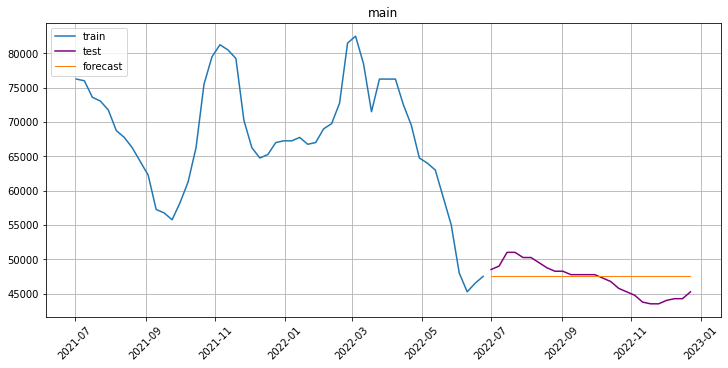

In [ ]:
NaiveLag(26, 233)

# Prophet

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptpwccq60/0t6cfiyi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptpwccq60/cmn6apz2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71910', 'data', 'file=/tmp/tmptpwccq60/0t6cfiyi.json', 'init=/tmp/tmptpwccq60/cmn6apz2.json', 'output', 'file=/tmp/tmptpwccq60/prophet_model6hulc1dc/prophet_model-20230211121050.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:10:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:10:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'main': 53.63504243761638}
{'main': 42.115107947616934}


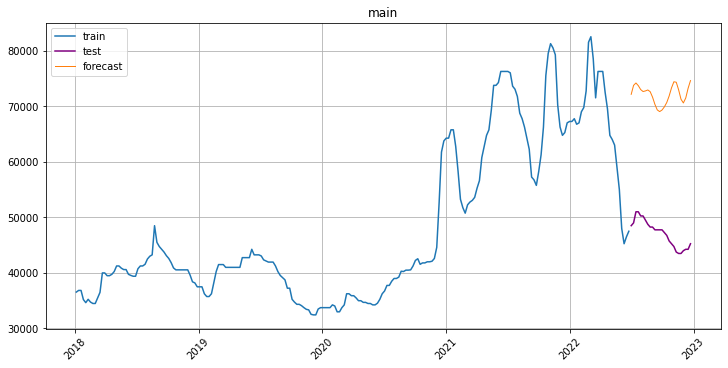

In [ ]:
train_ts, test_ts = ts.train_test_split(
    train_start="2018-01-05",
    train_end="2022-06-30",
    test_start="2022-07-01",
    test_end="2022-12-23",
)
HORIZON = 26
mape = MAPE()
smape = SMAPE()
model = ProphetModel(weekly_seasonality=True, yearly_seasonality=True)
model.fit(train_ts)

# Make the forecast
future_ts = train_ts.make_future(HORIZON)
forecast_ts = model.forecast(future_ts)
plot_forecast(forecast_ts, test_ts, train_ts, n_train_samples=261)
print(mape(y_true=test_ts, y_pred=forecast_ts))
print(smape(y_true=test_ts, y_pred=forecast_ts))

In [ ]:
min = 999
smin = 999
best = 2
sbest = 2
for i in range(2, 5):
  train_ts, test_ts = ts.train_test_split(
    train_start="2018-01-05",
    train_end="2022-06-30",
    test_start="2022-07-01",
    test_end="2022-12-23",
  )
  HORIZON = 26
  mape = MAPE()
  smape = SMAPE()
  model = ProphetModel(weekly_seasonality=True, mcmc_samples=i)
  model.fit(train_ts)

  # Make the forecast
  future_ts = train_ts.make_future(HORIZON)
  forecast_ts = model.forecast(future_ts)
  # plot_forecast(forecast_ts, test_ts, train_ts, n_train_samples=261)
  print(mape(y_true=test_ts, y_pred=forecast_ts))
  print(smape(y_true=test_ts, y_pred=forecast_ts))
  if mape(y_true=test_ts, y_pred=forecast_ts)['main'] < min:
    best = i
    min = mape(y_true=test_ts, y_pred=forecast_ts)['main']
    plot_forecast(forecast_ts, test_ts, train_ts, n_train_samples=12)


  if smape(y_true=test_ts, y_pred=forecast_ts)['main'] < min:
    sbest = i
    smin = mape(y_true=test_ts, y_pred=forecast_ts)['main']
    plot_forecast(forecast_ts, test_ts, train_ts, n_train_samples=12)

print("Best MAPE:", min, "from", best)
print("Best SMAPE:", smin, "from", sbest)

# Catboost

BEST LAG LIST (который смог найти):


```
lags = LagTransform(in_column="target", lags=list(range(1, 94, 1)))
```

Погрешность MAPE и SMAPE ~1.6%
```
HORIZON = 26
mape = MAPE()
smape = SMAPE()
train_ts, test_ts = ts.train_test_split(
    train_start="2018-01-05",
    train_end="2022-06-30",
    test_start="2022-07-01",
    test_end="2022-12-23",
)
lags = LagTransform(in_column="target", lags=list(range(1, 94, 1)))
train_ts.fit_transform([lags])
model = CatBoostMultiSegmentModel()
model.fit(train_ts)
future_ts = train_ts.make_future(HORIZON)
forecast_ts = model.forecast(future_ts)
train_ts.inverse_transform()
plot_forecast(forecast_ts, test_ts, train_ts, n_train_samples=261)
print(mape(y_true=test_ts, y_pred=forecast_ts))
print(smape(y_true=test_ts, y_pred=forecast_ts))
```

In [8]:
HORIZON = 26
mape = MAPE()
smape = SMAPE()
train_ts, test_ts = ts.train_test_split(
    train_start="2018-01-05",
    train_end="2022-06-30",
    test_start="2022-07-01",
    test_end="2022-12-23",
)
lags = LagTransform(in_column="target", lags=list(range(1, 94, 1)))
train_ts.fit_transform([lags])
model = CatBoostMultiSegmentModel()
model.fit(train_ts)
future_ts = train_ts.make_future(HORIZON)
forecast_ts = model.forecast(future_ts)
train_ts.inverse_transform()
plot_forecast(forecast_ts, test_ts, train_ts, n_train_samples=261)
print(mape(y_true=test_ts, y_pred=forecast_ts))
print(smape(y_true=test_ts, y_pred=forecast_ts))

c:\Users\igorv\OneDrive\Documents\GitHub\Samolet-armature\.venv\lib\site-packages\etna\datasets\tsdataset.py:333: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  future_dates = pd.date_range(


{'main': 1.647716906133194}
{'main': 1.6356645839662867}


In [ ]:
import warnings
warnings.filterwarnings("ignore")
history = {}
HORIZON = 26
mape = MAPE()
smape = SMAPE()
for n in range(1, 17):
    train_ts, test_ts = ts.train_test_split(
        train_start="2018-01-05",
        train_end="2022-06-30",
        test_start="2022-07-01",
        test_end="2022-12-23",
    )
    lags = LagTransform(in_column="target", lags=list(range(1, 94, 1)))
    train_ts.fit_transform([lags])
    model = CatBoostMultiSegmentModel(depth=n, learning_rate=0.030001, l2_leaf_reg=2.001)
    model.fit(train_ts)
    future_ts = train_ts.make_future(HORIZON)
    forecast_ts = model.forecast(future_ts)
    train_ts.inverse_transform()
    history[n] = mape(test_ts, forecast_ts)
    plot_forecast(forecast_ts, test_ts, train_ts, n_train_samples=261)
    print(mape(y_true=test_ts, y_pred=forecast_ts))
    print(smape(y_true=test_ts, y_pred=forecast_ts))

In [ ]:
max_val = max(history.values())
final_dict = {k:v for k, v in history.items() if v == max_val}

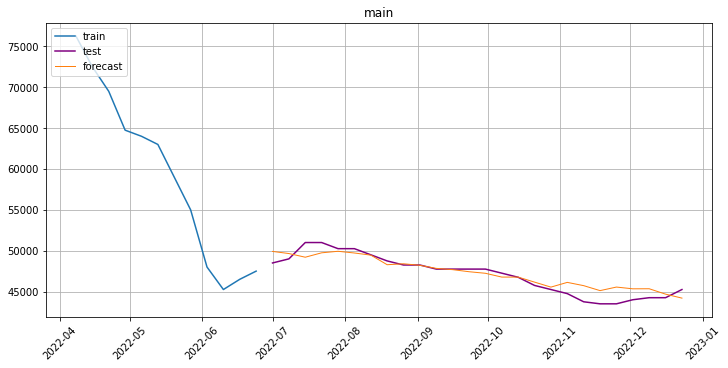

In [ ]:
plot_forecast(forecast_ts, test_ts, train_ts, n_train_samples=12)

# Holt

In [ ]:
from etna.models import HoltModel

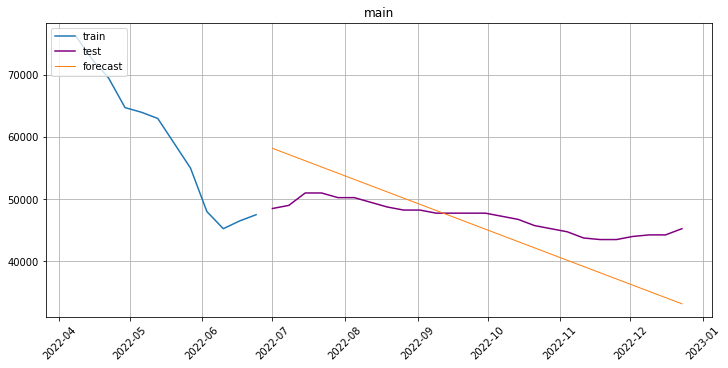

In [ ]:
train_ts, test_ts = ts.train_test_split(
    train_start="2018-01-05",
    train_end="2022-06-30",
    test_start="2022-07-01",
    test_end="2022-12-23",
)
HORIZON = 26
model = HoltModel(initialization_method='known', initial_level=20, initial_trend=20, smoothing_level=0.1, smoothing_trend=0.1, damping_trend=0.1)
model.fit(train_ts)
future_ts = train_ts.make_future(future_steps=HORIZON)
forecast_ts = model.forecast(future_ts)
plot_forecast(forecast_ts, test_ts, train_ts, n_train_samples=12)

#HoltWinters

In [ ]:
from etna.models import HoltWintersModel

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


{'main': 5.135602328607837}
{'main': 5.267676806808877}


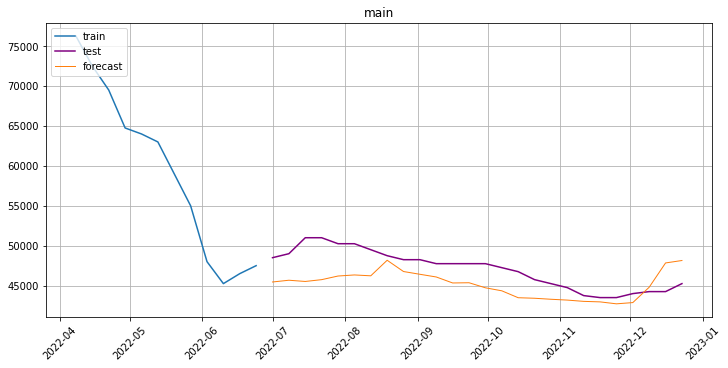

In [ ]:
mape = MAPE()
smape = SMAPE()
train_ts, test_ts = ts.train_test_split(
    train_start="2018-01-05",
    train_end="2022-06-30",
    test_start="2022-07-01",
    test_end="2022-12-23",
)
HORIZON = 26
model = HoltWintersModel(trend='add', seasonal='mul')
model.fit(train_ts)
future_ts = train_ts.make_future(future_steps=HORIZON)
forecast_ts = model.forecast(future_ts)
plot_forecast(forecast_ts, test_ts, train_ts, n_train_samples=12)
print(mape(y_true=test_ts, y_pred=forecast_ts))
print(smape(y_true=test_ts, y_pred=forecast_ts))

#AutoARIMAModel

In [ ]:
from etna.models import AutoARIMAModel

{'main': 4.441824195306805}
{'main': 4.347444583208498}


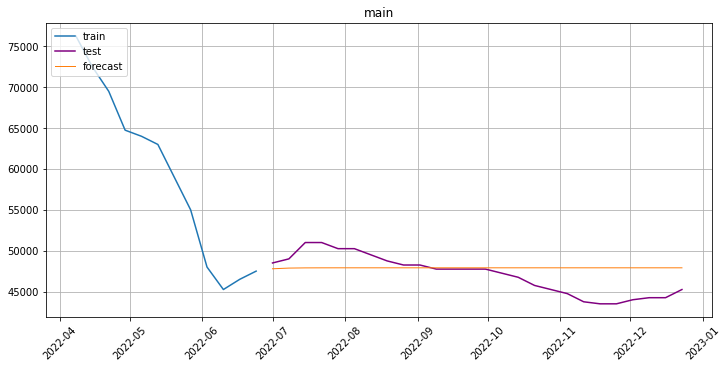

In [ ]:
mape = MAPE()
smape = SMAPE()
HORIZON = 26
train_ts, test_ts = ts.train_test_split(
    train_start="2018-01-05",
    train_end="2022-06-30",
    test_start="2022-07-01",
    test_end="2022-12-23",
  )

model = AutoARIMAModel(with_intercept=False)
model.fit(train_ts)
future_ts = train_ts.make_future(future_steps=HORIZON)
forecast_ts = model.forecast(future_ts)
plot_forecast(forecast_ts, test_ts, train_ts, n_train_samples=12)
print(mape(y_true=test_ts, y_pred=forecast_ts))
print(smape(y_true=test_ts, y_pred=forecast_ts))

#BATSModel

In [ ]:
from etna.models import BATSModel

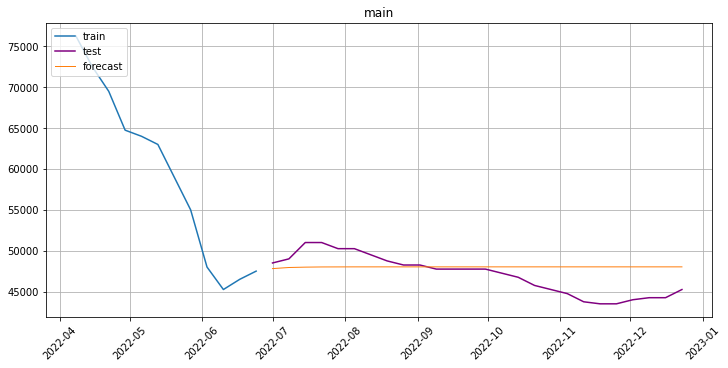

In [ ]:
HORIZON = 26
train_ts, test_ts = ts.train_test_split(
    train_start="2018-01-05",
    train_end="2022-06-30",
    test_start="2022-07-01",
    test_end="2022-12-23",
  )

model = BATSModel(use_box_cox=False)
model.fit(train_ts)
future_ts = train_ts.make_future(future_steps=HORIZON)
forecast_ts = model.forecast(future_ts)
plot_forecast(forecast_ts, test_ts, train_ts, n_train_samples=12)


#RNNModel

In [ ]:
from etna.models import RNNModel

ImportError: ignored

# FACEBOOK PROPHET

In [ ]:
!pip install fbprophet

In [ ]:
from prophet import Prophet
from prophet.diagnostics import cross_validation

In [ ]:
HORIZON = 26
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/armatura/prices_hist.csv')
df.head()

,datetime,price
0,2018-01-05,36550.0
1,2018-01-12,36850.0
2,2018-01-19,36850.0
3,2018-01-26,35200.0
4,2018-02-02,34650.0


In [ ]:
df.rename(columns={'datetime': 'ds', 'price': 'y'}, inplace=True)
train_df = df[:-HORIZON]
train_df.tail()

,ds,y
230,2022-06-03,48000.0
231,2022-06-10,45250.0
232,2022-06-17,46500.0
233,2022-06-24,47500.0
234,2022-07-01,48500.0


In [ ]:
m = Prophet(weekly_seasonality=True, yearly_seasonality=True)
m.fit(train_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptpwccq60/i865fh1s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptpwccq60/aircp1x_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65763', 'data', 'file=/tmp/tmptpwccq60/i865fh1s.json', 'init=/tmp/tmptpwccq60/aircp1x_.json', 'output', 'file=/tmp/tmptpwccq60/prophet_model_x9v72xq/prophet_model-20230211120655.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:06:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:06:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = m.make_future_dataframe(periods=HORIZON, freq='W-FRI')
future.tail()

,ds
256,2022-12-02
257,2022-12-09
258,2022-12-16
259,2022-12-23
260,2022-12-30


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
256,2022-12-02,66238.976837,58025.533690,74177.210307
257,2022-12-09,67167.905958,58954.593107,75518.131745
258,2022-12-16,68885.175589,61142.069934,76583.881860
259,2022-12-23,70122.136981,62575.397210,78088.525006
260,2022-12-30,70362.389393,62080.286339,78305.175137


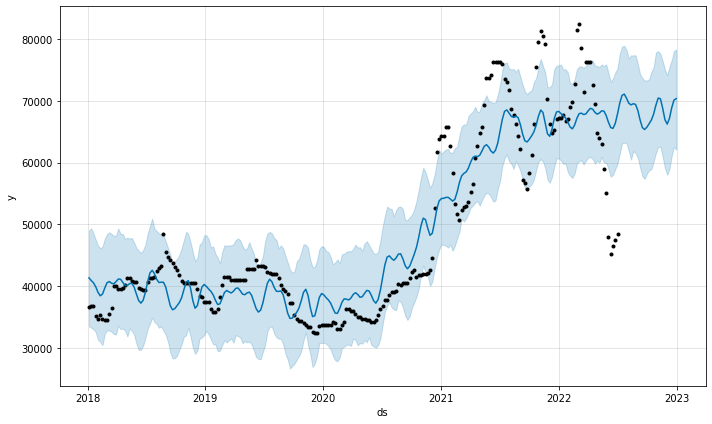

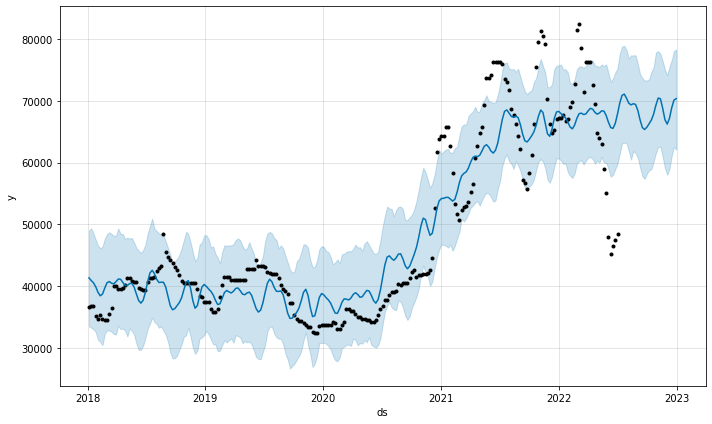

In [ ]:
m.plot(forecast)

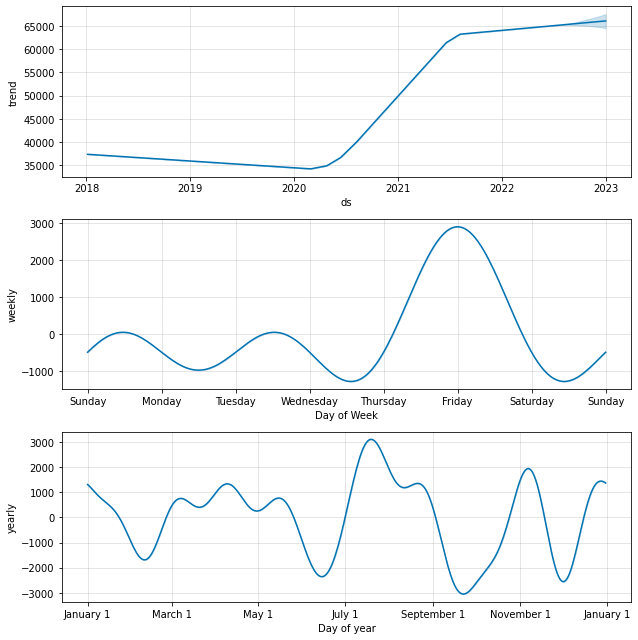

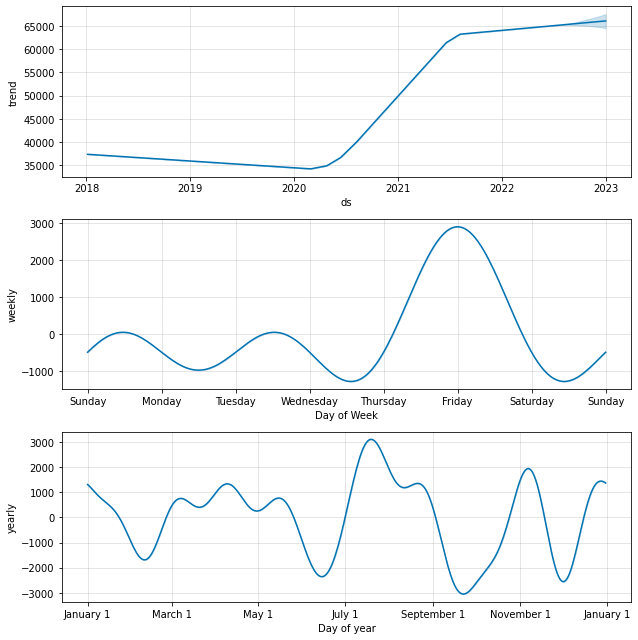

In [ ]:
m.plot_components(forecast)

#SARIMAXMODEL

In [ ]:
from etna.models import SARIMAXModel

{'main': 28.748247150207103}
{'main': 37.010506499513895}


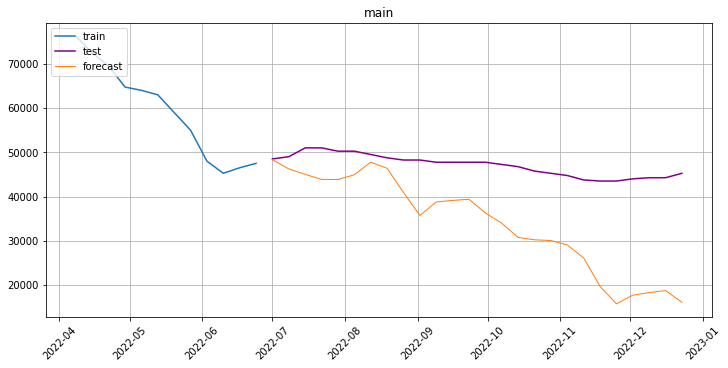

In [ ]:
mape = MAPE()
smape = SMAPE()
HORIZON = 26
train_ts, test_ts = ts.train_test_split(
    train_start="2018-01-05",
    train_end="2022-06-30",
    test_start="2022-07-01",
    test_end="2022-12-23",
  )

model = SARIMAXModel(trend='c', simple_differencing=False, enforce_stationarity=False, hamilton_representation=False, concentrate_scale=True, use_exact_diffuse=False, trend_offset=2)
model.fit(train_ts)
future_ts = train_ts.make_future(future_steps=HORIZON)
forecast_ts = model.forecast(future_ts)
plot_forecast(forecast_ts, test_ts, train_ts, n_train_samples=12)
print(mape(y_true=test_ts, y_pred=forecast_ts))
print(smape(y_true=test_ts, y_pred=forecast_ts))